<a href="https://colab.research.google.com/github/Bh0ss/Build-Week-1/blob/master/Build_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
#import plotly for graphing
!pip install plotly==4.5
import plotly
import plotly.express as px
import plotly.io as pio
#import chart studio to save graphs
!pip install chart_studio
import chart_studio
Username = 'Bhoss'
Api_key = '9LQ7FuefsT3hrjgzJ0Kt'
chart_studio.tools.set_credentials_file(username=Username, api_key=Api_key)
import chart_studio.plotly as py
import chart_studio.tools as tls

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 7.1MB 2.3MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 71kB 2.3MB/s 


In [2]:
#Premier League Dataframe
PL_Url = '/content/england-premier-league-players-2019-to-2020-stats.csv.html'

PL_Player = pd.read_csv(PL_Url)
Columns_to_drop = ['minutes_played_home','minutes_played_away','appearances_home',
                   'appearances_away','goals_home','goals_away','assists_home',
                   'assists_away','clean_sheets_home','clean_sheets_away',
                   'conceded_home','conceded_away','goals_per_90_home',
                   'goals_per_90_away', 'birthday']
PL_Player.drop(['minutes_played_home','minutes_played_away','appearances_home','appearances_away','goals_home','goals_away','assists_home','assists_away','clean_sheets_home','clean_sheets_away','conceded_home','conceded_away','goals_per_90_home','goals_per_90_away'], axis=1, inplace=True)
PL_Player

,full_name,age,birthday,league,season,position,Current Club,minutes_played_overall,nationality,appearances_overall,goals_overall,assists_overall,penalty_goals,penalty_misses,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Anthony Connolly,20,949017600,Premier League,2019/2020,Forward,Brighton & Hove Albion,1262,Republic of Ireland,24,3,1,0,0,5,21,0,0,0.29,0.07,0.21,421,1.50,60,53,0,1262,0.00,87,172,-1,3
1,Aaron Cresswell,30,629683200,Premier League,2019/2020,Defender,West Ham United,2730,England,31,3,0,0,0,5,49,7,0,0.10,0.00,0.10,910,1.62,56,88,390,0,0.23,155,266,128,6
2,Aaron Lennon,33,545529600,Premier League,2019/2020,Midfielder,Burnley,485,England,16,0,0,0,0,5,14,4,0,0.00,0.00,0.00,0,2.60,35,30,121,0,0.74,320,402,-1,17
3,Aaron Mooy,29,653356800,Premier League,2019/2020,Midfielder,Brighton & Hove Albion,2090,Australia,31,2,2,0,0,7,30,3,1,0.17,0.09,0.09,1045,1.29,70,67,697,1045,0.13,166,140,-1,8
4,Aaron Ramsdale,22,895104000,Premier League,2019/2020,Goalkeeper,AFC Bournemouth,3330,England,37,0,1,0,0,5,61,0,0,0.03,0.03,0.00,0,1.65,55,90,0,3330,0.00,362,248,135,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Youri Tielemans,23,862963200,Premier League,2019/2020,Midfielder,Leicester City,2835,Belgium,37,3,6,0,0,13,34,2,0,0.29,0.19,0.10,945,1.08,83,77,1418,473,0.06,156,64,-1,8
611,Yves Bissouma,23,841363200,Premier League,2019/2020,Midfielder,Brighton & Hove Albion,1263,Mali,22,1,0,0,0,7,18,4,0,0.07,0.00,0.07,1263,1.28,70,57,316,0,0.29,190,270,-1,13
612,Zechariah Medley,20,962928000,Premier League,2019/2020,Defender,Arsenal,0,England,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0.00,0,0,0,0,0.00,-1,-1,-1,-1
613,Ørjan Håskjold Nyland,29,652924800,Premier League,2019/2020,Goalkeeper,Aston Villa,537,Norway,7,0,0,0,0,1,12,0,0,0.00,0.00,0.00,0,2.01,45,77,0,0,0.00,311,331,161,18


In [3]:
#Ligue 1 Dataframe
French_url = '/content/france-ligue-1-players-2019-to-2020-stats.csv'
Ligue1 = pd.read_csv(French_url)
Ligue1.drop(Columns_to_drop, axis=1,inplace=True)
Ligue1

,full_name,age,league,season,position,Current Club,minutes_played_overall,nationality,appearances_overall,goals_overall,assists_overall,penalty_goals,penalty_misses,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Leya Iseka,22,Ligue 1,2019/2020,Forward,Toulouse,765,Belgium,22,2,0,1,1,1,21,2,0,0.24,0.00,0.24,383,2.47,36,35,383,0,0.24,65,383,-1,5
1,Abdallah Ali Mohamed,21,Ligue 1,2019/2020,Forward,Olympique Marseille,0,France,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0.00,0,0,0,0,0.00,-1,-1,-1,-1
2,Abdallah N'Dour,26,Ligue 1,2019/2020,Defender,Strasbourg,373,Senegal,6,0,0,0,0,2,4,2,1,0.00,0.00,0.00,0,0.97,93,62,187,0,0.48,341,343,51,14
3,Abdou Diallo,24,Ligue 1,2019/2020,Defender,PSG,1203,France,16,0,1,0,0,9,8,4,0,0.07,0.07,0.00,0,0.60,150,75,301,1203,0.30,354,162,6,27
4,Abdoulaye Bamba,30,Ligue 1,2019/2020,Defender,Angers SCO,553,Côte d'Ivoire,7,0,0,0,0,5,2,2,0,0.00,0.00,0.00,0,0.33,277,79,277,0,0.33,252,250,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,Yusuf Yazıcı,23,Ligue 1,2019/2020,Midfielder,Lille,843,Turkey,18,1,4,1,0,7,7,2,1,0.53,0.43,0.11,843,0.75,120,47,422,211,0.21,133,9,-1,7
607,Yvann Macon,39,Ligue 1,2019/2020,Midfielder,Saint-Étienne,97,France,2,0,0,0,0,0,4,1,0,0.00,0.00,0.00,0,3.71,24,49,97,0,0.93,-1,-1,-1,31
608,Zaydou Youssouf,21,Ligue 1,2019/2020,Midfielder,Saint-Étienne,1072,France,16,0,0,0,0,5,15,4,0,0.00,0.00,0.00,0,1.26,71,67,268,0,0.34,277,316,-1,28
609,Zinedine Ferhat,27,Ligue 1,2019/2020,Midfielder,Nîmes,2249,Algeria,26,3,4,0,0,6,41,1,0,0.28,0.16,0.12,750,1.64,55,87,2249,562,0.04,127,74,-1,3


In [4]:
#Seria A dataframe
Italy_url = '/content/italy-serie-a-players-2019-to-2020-stats.csv'
Calcio_A = pd.read_csv(Italy_url)
Calcio_A.drop(Columns_to_drop, axis=1,inplace=True)
Calcio_A

,full_name,age,league,season,position,Current Club,minutes_played_overall,nationality,appearances_overall,goals_overall,assists_overall,penalty_goals,penalty_misses,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Ramsey,29,Serie A,2019/2020,Midfielder,Juventus,1049,Wales,24,3,1,0,0,7,12,2,0,0.34,0.09,0.26,350,1.03,87,44,525,1049,0.17,80,181,-1,5
1,Abdoulaye Traorè,20,Serie A,2019/2020,Forward,Hellas Verona,0,Italy,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0.00,0,0,0,0,0.00,-1,-1,-1,-1
2,Adam Marušić,27,Serie A,2019/2020,Defender,Lazio,940,Montenegro,15,2,1,0,0,7,10,3,0,0.29,0.10,0.19,470,0.96,94,63,313,940,0.29,109,152,23,7
3,Adrien Rabiot,25,Serie A,2019/2020,Midfielder,Juventus,1917,France,28,1,1,0,0,9,20,7,1,0.09,0.05,0.05,1917,0.94,96,68,274,1917,0.33,230,226,-1,12
4,Adrien Tameze,25,Serie A,2019/2020,Midfielder,Atalanta,206,France,7,0,0,0,0,2,2,0,0,0.00,0.00,0.00,0,0.87,103,29,0,0,0.00,-1,-1,-1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,Yildirim Mert Cetin,23,Serie A,2019/2020,Defender,Roma,254,Turkey,6,0,0,0,0,1,2,4,1,0.00,0.00,0.00,0,0.71,127,42,64,0,1.42,-1,-1,-1,21
698,Žan Majer,27,Serie A,2019/2020,Midfielder,Lecce,1669,Slovenia,27,1,1,0,0,2,41,7,0,0.11,0.05,0.05,1669,2.21,41,62,238,1669,0.38,233,227,-1,16
699,Zlatan Ibrahimović,38,Serie A,2019/2020,Forward,AC Milan,1365,Sweden,18,10,5,2,1,6,16,1,0,0.99,0.33,0.66,137,1.05,85,76,1365,273,0.07,12,14,-1,2
700,Łukasz Skorupski,29,Serie A,2019/2020,Goalkeeper,Bologna,3330,Poland,37,0,0,0,0,2,57,2,0,0.00,0.00,0.00,0,1.54,58,90,1665,0,0.05,425,431,124,20


In [5]:
#Bundesliga Dataframe
Germany = '/content/germany-bundesliga-players-2019-to-2020-stats.csv'
Bundesliga = pd.read_csv(Germany)
Bundesliga.drop(Columns_to_drop,axis=1,inplace=True)
Bundesliga

,full_name,age,league,season,position,Current Club,minutes_played_overall,nationality,appearances_overall,goals_overall,assists_overall,penalty_goals,penalty_misses,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Herzog,22,Bundesliga,2019/2020,Midfielder,Borussia M'gladbach,0,Germany,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0.00,0,0,0,0,0.00,-1,-1,-1,-1
1,Aarón Martín,23,Bundesliga,2019/2020,Defender,Mainz 05,1797,Spain,22,0,0,0,0,2,48,2,0,0.00,0.00,0.00,0,2.40,37,82,899,0,0.10,379,379,142,24
2,Abdelhamid Sabiri,23,Bundesliga,2019/2020,Midfielder,Paderborn,1036,Morocco,24,4,1,1,0,4,23,6,0,0.43,0.09,0.35,259,2.00,45,43,173,1036,0.52,54,180,-1,4
3,Achraf Hakimi Mouh,21,Bundesliga,2019/2020,Defender,Borussia Dortmund,2715,Morocco,33,5,10,0,0,14,34,5,0,0.50,0.33,0.17,543,1.13,80,82,543,272,0.17,115,20,35,7
4,Adam Bodzek,34,Bundesliga,2019/2020,Defender,Fortuna Düsseldorf,2017,Germany,28,0,0,0,0,4,44,10,0,0.00,0.00,0.00,0,1.96,46,72,202,0,0.45,251,299,126,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Yussuf Poulsen,26,Bundesliga,2019/2020,Forward,RB Leipzig,1216,Denmark,22,5,6,0,0,6,12,2,0,0.81,0.44,0.37,243,0.89,101,55,608,203,0.15,51,7,-1,6
567,Yūya Ōsako,30,Bundesliga,2019/2020,Forward,Werder Bremen,1859,Japan,28,8,2,0,0,4,41,2,0,0.48,0.10,0.39,232,1.98,45,66,930,930,0.10,46,164,-1,1
568,Yvon Mvogo,26,Bundesliga,2019/2020,Goalkeeper,RB Leipzig,180,Switzerland,2,0,0,0,0,0,3,0,0,0.00,0.00,0.00,0,1.50,60,90,0,0,0.00,-1,-1,-1,22
569,Zack Steffen,25,Bundesliga,2019/2020,Goalkeeper,Fortuna Düsseldorf,1530,USA,17,0,0,0,0,2,36,0,0,0.00,0.00,0.00,0,2.12,43,90,0,0,0.00,312,317,138,18


In [6]:
#La Liga dataframe
Spain = '/content/spain-la-liga-players-2019-to-2020-stats.csv'
LaLiga = pd.read_csv(Spain)
LaLiga.drop(Columns_to_drop,axis=1,inplace=True)
LaLiga

,full_name,age,league,season,position,Current Club,minutes_played_overall,nationality,appearances_overall,goals_overall,assists_overall,penalty_goals,penalty_misses,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aarón Escandell Banacloche,24,La Liga,2019/2020,Goalkeeper,Granada CF,270,Spain,3,0,0,0,0,1,3,0,0,0.00,0.00,0.00,0,1.00,90,90,0,0,0.00,-1,-1,-1,24
1,Abdallahi Mohamed Mahmoud,20,La Liga,2019/2020,Defender,Deportivo Alavés,150,Mauritania,3,0,0,0,0,0,3,1,0,0.00,0.00,0.00,0,1.80,50,50,150,0,0.60,-1,-1,-1,20
2,Abdón Prats Bastidas,27,La Liga,2019/2020,Forward,RCD Mallorca,260,Spain,20,0,0,0,1,1,4,1,0,0.00,0.00,0.00,0,1.38,65,13,260,0,0.35,-1,-1,-1,10
3,Abdul Rahman Baba,26,La Liga,2019/2020,Defender,RCD Mallorca,109,Ghana,2,0,0,0,0,1,1,1,0,0.00,0.00,0.00,0,0.83,109,55,109,0,0.83,-1,-1,-1,18
4,Adnan Januzaj,25,La Liga,2019/2020,Midfielder,Real Sociedad,1164,Belgium,24,3,3,0,0,6,13,3,0,0.46,0.23,0.23,388,1.01,90,49,388,388,0.23,75,35,-1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,Yeray Álvarez López,25,La Liga,2019/2020,Defender,Athletic Club Bilbao,2811,Spain,32,0,0,0,0,11,25,2,0,0.00,0.00,0.00,0,0.80,112,88,1406,0,0.06,311,268,25,25
646,Yoel Rodríguez Oterino,31,La Liga,2019/2020,Goalkeeper,SD Eibar,270,Spain,3,0,0,0,0,1,4,1,0,0.00,0.00,0.00,0,1.33,68,90,270,0,0.33,-1,-1,-1,20
647,Youssef En-Nesyri,23,La Liga,2019/2020,Forward,Sevilla FC,2175,Morocco,36,8,2,0,0,9,35,3,0,0.41,0.08,0.33,272,1.45,62,60,725,1088,0.12,40,168,-1,2
648,Yuri,30,La Liga,2019/2020,Defender,Athletic Club Bilbao,2852,Spain,33,2,1,0,0,12,26,7,0,0.09,0.03,0.06,1426,0.82,110,86,407,2852,0.22,203,246,27,6


In [7]:
#MLS dataframe
Usa = '/content/usa-mls-players-2019-to-2019-stats.csv.html'
MLS = pd.read_csv(Usa)
MLS.drop(Columns_to_drop,axis=1,inplace=True)
pd.set_option("display.max_rows", None, "display.max_columns", None)
MLS

,full_name,age,league,season,position,Current Club,minutes_played_overall,nationality,appearances_overall,goals_overall,assists_overall,penalty_goals,penalty_misses,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Herrera,23,MLS,2019,Defender,Real Salt Lake,2948,USA,34,0,3,0,0,11,37,8,1,0.09,0.09,0.00,0,1.13,80,87,328,983,0.27,392,205,34,23
1,Aaron Long,27,MLS,2019,Defender,New York RB,2206,USA,25,2,0,0,0,6,38,3,0,0.08,0.00,0.08,1103,1.55,58,88,735,0,0.12,220,336,132,7
2,Abdul Rwatubyaye,23,MLS,2019,Defender,Sporting KC,165,Rwanda,2,0,0,0,0,0,6,1,0,0.00,0.00,0.00,0,3.27,28,83,165,0,0.55,-1,-1,-1,21
3,Abdulkadir Haji,20,MLS,2019,Midfielder,SJ Earthquakes,40,USA,4,0,0,0,0,0,1,0,0,0.00,0.00,0.00,0,2.25,40,10,0,0,0.00,-1,-1,-1,21
4,Aboubacar Keita,20,MLS,2019,Defender,Columbus Crew,801,USA,10,0,0,0,0,1,9,0,0,0.00,0.00,0.00,0,1.01,89,80,0,0,0.00,324,353,19,16
5,Abu Danladi,24,MLS,2019,Forward,Minnesota United,715,Ghana,25,2,2,0,0,8,5,3,0,0.50,0.25,0.25,358,0.63,143,29,238,358,0.38,107,55,-1,12
6,Adam Grinwis,29,MLS,2019,Goalkeeper,Orlando City,0,USA,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0.00,0,0,0,0,0.00,-1,-1,-1,-1
7,Adam Henley,26,MLS,2019,Defender,Real Salt Lake,0,Wales,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0.00,0,0,0,0,0.00,-1,-1,-1,-1
8,Adam Lundqvist,26,MLS,2019,Defender,Houston Dynamo,2387,Sweden,28,0,3,0,0,3,37,4,0,0.11,0.11,0.00,0,1.40,65,85,597,796,0.15,401,176,99,25
9,Adama Valentin Diomande,30,MLS,2019,Forward,Los Angeles FC,1503,Norway,27,10,5,0,0,8,26,1,0,0.90,0.30,0.60,150,1.56,58,56,1503,301,0.06,16,29,-1,3


In [8]:
#Show players who had more than .5 goals per 90
MLSTopScorers = MLS[MLS['goals_per_90_overall'] > .5]
MLSTopScorers

,full_name,age,league,season,position,Current Club,minutes_played_overall,nationality,appearances_overall,goals_overall,assists_overall,penalty_goals,penalty_misses,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
9,Adama Valentin Diomande,30,MLS,2019,Forward,Los Angeles FC,1503,Norway,27,10,5,0,0,8,26,1,0,0.90,0.30,0.60,150,1.56,58,56,1503,301,0.06,16,29,-1,3
62,Anthony Fontana,20,MLS,2019,Midfielder,Philadelphia Union,119,USA,8,1,0,0,0,2,4,0,0,0.76,0.00,0.76,119,3.03,30,15,0,0,0.00,-1,-1,-1,13
101,Brian Leonel Fernández,25,MLS,2019,Forward,Portland Timbers,1411,Argentina,19,11,1,0,0,6,14,5,1,0.77,0.06,0.70,128,0.89,101,74,235,1411,0.38,7,255,-1,1
103,Brian White,24,MLS,2019,Forward,New York RB,1338,USA,20,9,1,0,0,6,21,1,0,0.67,0.07,0.61,149,1.41,64,67,1338,1338,0.07,14,233,-1,2
120,Carlos Vela,31,MLS,2019,Forward,Los Angeles FC,2906,Mexico,33,36,11,9,2,9,38,1,0,1.46,0.34,1.11,81,1.18,76,88,2906,264,0.03,1,22,-1,1
133,Chris Wondolowski,37,MLS,2019,Forward,SJ Earthquakes,1984,USA,32,15,2,0,0,6,34,4,1,0.77,0.09,0.68,132,1.54,58,62,397,992,0.23,8,198,-1,1
174,David Accam,29,MLS,2019,Forward,Columbus Crew,1002,Ghana,23,6,3,0,0,3,14,1,0,0.81,0.27,0.54,167,1.26,72,44,1002,334,0.09,21,42,-1,3
258,Francis Atuahene,24,MLS,2019,Forward,FC Dallas,26,Ghana,1,1,0,0,0,0,0,0,0,3.46,0.00,3.46,26,0.00,0,26,0,0,0.00,-1,-1,-1,14
288,Gustavo Leonardo Bou,30,MLS,2019,Forward,New England Revolution,1245,Argentina,15,9,1,0,0,4,18,1,0,0.72,0.07,0.65,138,1.30,69,83,1245,1245,0.07,10,239,-1,2
298,Heber Araujo dos Santos,28,MLS,2019,Forward,New York City,1606,Brazil,23,15,3,0,0,6,19,1,0,1.01,0.17,0.84,107,1.06,85,70,1606,535,0.06,5,118,-1,1


In [9]:
#Filter data for players under 22
MLS_YOUNG_TOPSCORERS = MLSTopScorers[MLSTopScorers['age'] < 22 ]
MLS_YOUNG_TOPSCORERS

,full_name,age,league,season,position,Current Club,minutes_played_overall,nationality,appearances_overall,goals_overall,assists_overall,penalty_goals,penalty_misses,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
62,Anthony Fontana,20,MLS,2019,Midfielder,Philadelphia Union,119,USA,8,1,0,0,0,2,4,0,0,0.76,0.00,0.76,119,3.03,30,15,0,0,0.00,-1,-1,-1,13
428,Lassi Lappalainen,21,MLS,2019,Forward,Montreal Impact,683,Finland,11,5,0,0,0,2,16,0,0,0.66,0.00,0.66,137,2.11,43,62,0,0,0.00,9,360,-1,3
472,Mason Toye,21,MLS,2019,Forward,Minnesota United,847,USA,18,6,2,0,0,5,10,3,1,0.85,0.21,0.64,141,1.06,85,47,212,424,0.43,11,79,-1,3


In [10]:
#Clean and filter data to show the mls players that had conceded less than 1 goal
# with over 90 mins played and were under 22
MLS_Best_DefendersDirty = MLS[MLS['conceded_per_90_overall'] < 1 ]
MLS_Best_Defenders_Clean = MLS_Best_DefendersDirty[MLS_Best_DefendersDirty['minutes_played_overall'] > 90 ]
MLS_Best_Defenders_Young = MLS_Best_Defenders_Clean[MLS_Best_Defenders_Clean['age'] < 22]
MLS_Best_Defenders_Young_Clean = MLS_Best_Defenders_Young[MLS_Best_Defenders_Young['position'] == 'Defender']
MLS_Best_Defenders_Young_Clean

,full_name,age,league,season,position,Current Club,minutes_played_overall,nationality,appearances_overall,goals_overall,assists_overall,penalty_goals,penalty_misses,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
126,Chris Durkin,20,MLS,2019,Defender,DC United,635,USA,13,1,0,0,0,7,6,1,0,0.14,0.0,0.14,635,0.85,106,49,635,0,0.14,179,462,3,9
195,Diego José Palacios Espinoza,21,MLS,2019,Defender,Los Angeles FC,92,Ecuador,2,0,0,0,0,0,1,0,0,0.00,0.0,0.00,0,0.98,92,46,0,0,0.00,-1,-1,-1,27
460,Marco Farfan,21,MLS,2019,Defender,Portland Timbers,190,USA,3,0,0,0,0,1,2,2,0,0.00,0.0,0.00,0,0.95,95,63,95,0,0.95,-1,-1,-1,26


In [11]:
#Add together five leauges using concat as dataframes are all the same column headers
Top5 = pd.concat([LaLiga,Bundesliga,Calcio_A,Ligue1,PL_Player])
pd.set_option("display.max_rows", None, "display.max_columns", None)
Top5.head()

,full_name,age,league,season,position,Current Club,minutes_played_overall,nationality,appearances_overall,goals_overall,assists_overall,penalty_goals,penalty_misses,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,birthday
0,Aarón Escandell Banacloche,24,La Liga,2019/2020,Goalkeeper,Granada CF,270,Spain,3,0,0,0,0,1,3,0,0,0.00,0.00,0.00,0,1.00,90,90,0,0,0.00,-1,-1,-1,24,NaN
1,Abdallahi Mohamed Mahmoud,20,La Liga,2019/2020,Defender,Deportivo Alavés,150,Mauritania,3,0,0,0,0,0,3,1,0,0.00,0.00,0.00,0,1.80,50,50,150,0,0.60,-1,-1,-1,20,NaN
2,Abdón Prats Bastidas,27,La Liga,2019/2020,Forward,RCD Mallorca,260,Spain,20,0,0,0,1,1,4,1,0,0.00,0.00,0.00,0,1.38,65,13,260,0,0.35,-1,-1,-1,10,NaN
3,Abdul Rahman Baba,26,La Liga,2019/2020,Defender,RCD Mallorca,109,Ghana,2,0,0,0,0,1,1,1,0,0.00,0.00,0.00,0,0.83,109,55,109,0,0.83,-1,-1,-1,18,NaN
4,Adnan Januzaj,25,La Liga,2019/2020,Midfielder,Real Sociedad,1164,Belgium,24,3,3,0,0,6,13,3,0,0.46,0.23,0.23,388,1.01,90,49,388,388,0.23,75,35,-1,7,NaN


In [12]:
#Clean and filter data to be left with top 5 league players who conceded less than one goal over 90 mins and are under 22
Top5_Best_DefendersDirty = Top5[Top5['conceded_per_90_overall'] < 1 ]
Top5_Best_Defenders_Clean = Top5_Best_DefendersDirty[Top5_Best_DefendersDirty['minutes_played_overall'] > 90 ]
Top5_Best_Defenders_Young = Top5_Best_Defenders_Clean[Top5_Best_Defenders_Clean['age'] < 22]
Top5_Best_Defenders_Young_Clean = Top5_Best_Defenders_Young[Top5_Best_Defenders_Young['position'] == 'Defender']
Top5_Best_Defenders_Young_Clean

,full_name,age,league,season,position,Current Club,minutes_played_overall,nationality,appearances_overall,goals_overall,assists_overall,penalty_goals,penalty_misses,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,birthday
350,Jules Koundé,21,La Liga,2019/2020,Defender,Sevilla FC,2306,France,29,1,1,0,0,14,22,6,0,0.08,0.04,0.04,2306,0.86,105,80,384,2306,0.23,242,228,33,15,NaN
399,Manuel Sánchez De La Peña,19,La Liga,2019/2020,Defender,Atlético Madrid,326,Spain,5,0,0,0,0,4,0,1,0,0.00,0.00,0.00,0,0.00,0,65,326,0,0.28,338,305,1,17,NaN
445,Mohamed Salisu Abdul Karim,21,La Liga,2019/2020,Defender,Real Valladolid,2726,Ghana,31,1,1,0,0,10,28,4,0,0.07,0.03,0.03,2726,0.92,97,88,682,2726,0.13,245,233,44,10,NaN
541,Ronald Federico Araújo da Silva,21,La Liga,2019/2020,Defender,FC Barcelona,238,Uruguay,6,0,0,0,0,5,0,1,1,0.00,0.00,0.00,0,0.00,0,40,119,0,0.76,-1,-1,-1,21,NaN
169,Ibrahima Konaté,21,Bundesliga,2019/2020,Defender,RB Leipzig,567,France,8,0,0,0,0,3,3,2,0,0.00,0.00,0.00,0,0.48,189,71,284,0,0.32,367,366,2,26,NaN
443,Marash Kumbulla,20,Serie A,2019/2020,Defender,Hellas Verona,1959,Albania,25,1,0,0,0,7,20,7,1,0.05,0.00,0.05,1959,0.92,98,78,280,0,0.32,238,426,20,13,NaN
91,Boubacar Kamara,20,Ligue 1,2019/2020,Defender,Olympique Marseille,2141,France,24,1,2,0,0,9,20,8,1,0.13,0.08,0.04,2141,0.84,107,89,238,1071,0.38,203,155,34,10,NaN
114,Colin Dagba,21,Ligue 1,2019/2020,Defender,PSG,666,France,10,0,0,0,0,6,4,1,0,0.00,0.00,0.00,0,0.54,167,67,666,0,0.14,359,359,5,21,NaN
140,Domagoj Bradarić,20,Ligue 1,2019/2020,Defender,Lille,1419,Croatia,18,0,1,0,0,8,13,1,0,0.06,0.06,0.00,0,0.82,109,79,1419,1419,0.06,388,180,30,22,NaN
414,Moussa Wagué,21,Ligue 1,2019/2020,Defender,Nice,197,Senegal,5,0,2,0,0,1,2,0,0,0.91,0.91,0.00,0,0.91,99,39,0,99,0.00,-1,-1,-1,20,NaN


In [13]:
#filter dataframee to only show players with a goals/90 greater than .5 and apperances greater than 10
Top5TopScorers = Top5[Top5['goals_per_90_overall'] > .5]
Top5TopScorers_clean = Top5TopScorers[Top5TopScorers['appearances_overall'] >= 10]
Top5TopScorers_clean

,full_name,age,league,season,position,Current Club,minutes_played_overall,nationality,appearances_overall,goals_overall,assists_overall,penalty_goals,penalty_misses,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,birthday
30,Alexander Isak,20,La Liga,2019/2020,Forward,Real Sociedad,1497,Sweden,37,9,1,0,0,9,19,4,0,0.60,0.06,0.54,166,1.14,79,40,374,1497,0.24,8,192,-1,3,NaN
37,Alvaro Morata,27,La Liga,2019/2020,Forward,Atlético Madrid,2117,Spain,34,12,2,2,1,15,12,6,1,0.60,0.09,0.51,176,0.51,176,62,353,1059,0.26,12,152,-1,1,NaN
56,Ángel,33,La Liga,2019/2020,Forward,Getafe CF,1388,Spain,32,10,3,1,0,11,20,6,0,0.84,0.19,0.65,139,1.30,69,43,231,463,0.39,4,57,-1,2,NaN
60,Anssumane Fati,17,La Liga,2019/2020,Forward,FC Barcelona,1065,Guinea-Bissau,24,7,1,0,0,7,12,3,1,0.68,0.08,0.59,152,1.01,89,44,266,1065,0.34,7,162,-1,5,NaN
84,Asier Villalibre Molina,22,La Liga,2019/2020,Forward,Athletic Club Bilbao,522,Spain,19,3,0,0,0,4,8,0,0,0.52,0.00,0.52,174,1.38,65,27,0,0,0.00,10,307,-1,5,NaN
215,Gerard Moreno,28,La Liga,2019/2020,Forward,Villarreal,2755,Spain,35,18,5,1,1,12,36,5,0,0.75,0.16,0.59,153,1.18,77,79,551,551,0.16,6,74,-1,1,NaN
353,Karim Benzema,32,La Liga,2019/2020,Forward,Real Madrid,3155,France,37,21,8,5,0,18,22,0,0,0.83,0.23,0.60,150,0.63,143,85,0,394,0.00,5,36,-1,1,NaN
354,Karl Toko Ekambi,27,La Liga,2019/2020,Forward,Villarreal,995,Cameroon,18,6,2,0,0,6,14,0,0,0.72,0.18,0.54,166,1.27,71,55,0,498,0.00,9,61,-1,3,NaN
371,Lionel Messi,33,La Liga,2019/2020,Forward,FC Barcelona,2880,Argentina,33,25,21,5,0,14,27,4,0,1.44,0.66,0.78,115,0.84,107,87,720,137,0.13,2,1,-1,1,NaN
381,Luis Ezequiel Ávila,26,La Liga,2019/2020,Forward,CA Osasuna,1593,Argentina,20,9,2,0,0,5,21,6,0,0.62,0.11,0.51,177,1.19,76,80,266,797,0.34,11,119,-1,1,NaN


In [14]:
#filter scorers under the age of 22
YoungTop5Scorers = Top5TopScorers_clean[Top5TopScorers_clean['age'] < 22]
YoungTop5Scorers

,full_name,age,league,season,position,Current Club,minutes_played_overall,nationality,appearances_overall,goals_overall,assists_overall,penalty_goals,penalty_misses,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,birthday
30,Alexander Isak,20,La Liga,2019/2020,Forward,Real Sociedad,1497,Sweden,37,9,1,0,0,9,19,4,0,0.60,0.06,0.54,166,1.14,79,40,374,1497,0.24,8,192,-1,3,NaN
60,Anssumane Fati,17,La Liga,2019/2020,Forward,FC Barcelona,1065,Guinea-Bissau,24,7,1,0,0,7,12,3,1,0.68,0.08,0.59,152,1.01,89,44,266,1065,0.34,7,162,-1,5,NaN
179,Jadon Sancho,20,Bundesliga,2019/2020,Midfielder,Borussia Dortmund,2290,England,32,17,16,0,0,13,31,2,0,1.30,0.63,0.67,135,1.22,74,72,1145,143,0.08,12,2,-1,1,NaN
436,Paulo Henrique Sampaio Filho,20,Bundesliga,2019/2020,Midfielder,Bayer Leverkusen,292,Brazil,13,3,2,0,0,5,2,1,0,1.54,0.62,0.92,97,0.62,146,22,292,146,0.31,4,3,-1,7,NaN
101,Bobby Adekanye,21,Serie A,2019/2020,Forward,Lazio,177,Netherlands,11,1,0,0,0,3,3,1,0,0.51,0.00,0.51,177,1.53,59,16,177,0,0.51,-1,-1,-1,8,NaN
272,Giacomo Raspadori,20,Serie A,2019/2020,Forward,Sassuolo,257,Italy,11,2,0,0,0,1,3,0,0,0.70,0.00,0.70,129,1.05,86,23,0,0,0.00,-1,-1,-1,8,NaN
526,Musa Barrow,21,Serie A,2019/2020,Forward,Bologna,1539,Gambia,25,9,4,1,1,1,24,1,0,0.76,0.23,0.53,171,1.40,64,62,1539,385,0.06,19,48,-1,1,NaN
282,Josh Maja,21,Ligue 1,2019/2020,Forward,Bordeaux,722,England,21,6,2,0,0,4,5,0,0,1.00,0.25,0.75,120,0.62,144,34,0,361,0.00,6,30,-1,2,NaN
312,Kylian Mbappé,21,Ligue 1,2019/2020,Forward,PSG,1515,France,20,18,5,0,0,10,16,0,0,1.37,0.30,1.07,84,0.95,95,76,0,303,0.00,1,19,-1,1,NaN
567,Victor James Osimhen,21,Ligue 1,2019/2020,Forward,Lille,2289,Nigeria,27,13,4,2,1,12,22,4,0,0.67,0.16,0.51,176,0.87,104,85,572,572,0.16,18,77,-1,1,NaN


In [15]:
Kylian_Mbappe = Top5.loc[Top5['full_name'] == 'Kylian Mbappé']
Kylian_Mbappe

,full_name,age,league,season,position,Current Club,minutes_played_overall,nationality,appearances_overall,goals_overall,assists_overall,penalty_goals,penalty_misses,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,birthday
312,Kylian Mbappé,21,Ligue 1,2019/2020,Forward,PSG,1515,France,20,18,5,0,0,10,16,0,0,1.37,0.3,1.07,84,0.95,95,76,0,303,0.0,1,19,-1,1,NaN


In [16]:
Gareth_Bale = Top5.loc[Top5['full_name'] == 'Gareth Bale']

In [17]:
Mason_Toye = MLS_YOUNG_TOPSCORERS.loc[MLS_YOUNG_TOPSCORERS['full_name'] == 'Mason Toye']

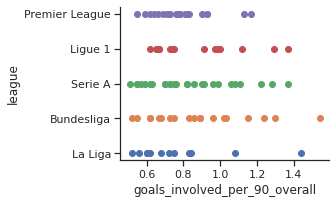

In [18]:
#rough draft "sketch up graphs" to help get the juices flowing
sns.set(style='ticks')
fg = sns.FacetGrid(data=Top5TopScorers_clean, hue='league', aspect=1.61)
fg.map(plt.scatter, 'goals_involved_per_90_overall', 'league')

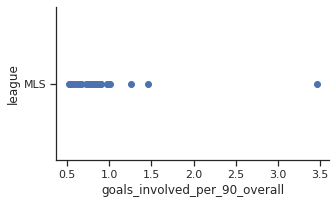

In [19]:
#rough draft "sketch up graphs" to help get the juices flowing

sns.set(style='ticks')
fg = sns.FacetGrid(data=MLSTopScorers, hue='league', aspect=1.61)
fg.map(plt.scatter, 'goals_involved_per_90_overall', 'league')

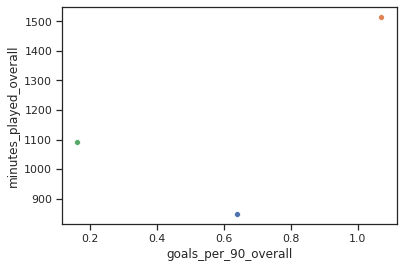

In [20]:
sns.scatterplot(x = 'goals_per_90_overall', y='minutes_played_overall', data=Mason_Toye)
sns.scatterplot(x = 'goals_per_90_overall', y='minutes_played_overall', data=Kylian_Mbappe)
sns.scatterplot(x = 'goals_per_90_overall', y='minutes_played_overall', data=Gareth_Bale)

In [21]:
#join together cleaned data for top scorers from 5 leagues plus mls
YoungTop5Scorers = pd.DataFrame(YoungTop5Scorers)
TopScorers_W_MLS = pd.concat([YoungTop5Scorers,MLS_YOUNG_TOPSCORERS])
TopScorers_W_MLS

,full_name,age,league,season,position,Current Club,minutes_played_overall,nationality,appearances_overall,goals_overall,assists_overall,penalty_goals,penalty_misses,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,birthday
30,Alexander Isak,20,La Liga,2019/2020,Forward,Real Sociedad,1497,Sweden,37,9,1,0,0,9,19,4,0,0.60,0.06,0.54,166,1.14,79,40,374,1497,0.24,8,192,-1,3,NaN
60,Anssumane Fati,17,La Liga,2019/2020,Forward,FC Barcelona,1065,Guinea-Bissau,24,7,1,0,0,7,12,3,1,0.68,0.08,0.59,152,1.01,89,44,266,1065,0.34,7,162,-1,5,NaN
179,Jadon Sancho,20,Bundesliga,2019/2020,Midfielder,Borussia Dortmund,2290,England,32,17,16,0,0,13,31,2,0,1.30,0.63,0.67,135,1.22,74,72,1145,143,0.08,12,2,-1,1,NaN
436,Paulo Henrique Sampaio Filho,20,Bundesliga,2019/2020,Midfielder,Bayer Leverkusen,292,Brazil,13,3,2,0,0,5,2,1,0,1.54,0.62,0.92,97,0.62,146,22,292,146,0.31,4,3,-1,7,NaN
101,Bobby Adekanye,21,Serie A,2019/2020,Forward,Lazio,177,Netherlands,11,1,0,0,0,3,3,1,0,0.51,0.00,0.51,177,1.53,59,16,177,0,0.51,-1,-1,-1,8,NaN
272,Giacomo Raspadori,20,Serie A,2019/2020,Forward,Sassuolo,257,Italy,11,2,0,0,0,1,3,0,0,0.70,0.00,0.70,129,1.05,86,23,0,0,0.00,-1,-1,-1,8,NaN
526,Musa Barrow,21,Serie A,2019/2020,Forward,Bologna,1539,Gambia,25,9,4,1,1,1,24,1,0,0.76,0.23,0.53,171,1.40,64,62,1539,385,0.06,19,48,-1,1,NaN
282,Josh Maja,21,Ligue 1,2019/2020,Forward,Bordeaux,722,England,21,6,2,0,0,4,5,0,0,1.00,0.25,0.75,120,0.62,144,34,0,361,0.00,6,30,-1,2,NaN
312,Kylian Mbappé,21,Ligue 1,2019/2020,Forward,PSG,1515,France,20,18,5,0,0,10,16,0,0,1.37,0.30,1.07,84,0.95,95,76,0,303,0.00,1,19,-1,1,NaN
567,Victor James Osimhen,21,Ligue 1,2019/2020,Forward,Lille,2289,Nigeria,27,13,4,2,1,12,22,4,0,0.67,0.16,0.51,176,0.87,104,85,572,572,0.16,18,77,-1,1,NaN


In [22]:
#join together mls defenders and top defenders after filtering data
TopDefenders_W_MLS = pd.concat([Top5_Best_Defenders_Young_Clean,MLS_Best_Defenders_Young_Clean])
TopDefenders_W_MLS

,full_name,age,league,season,position,Current Club,minutes_played_overall,nationality,appearances_overall,goals_overall,assists_overall,penalty_goals,penalty_misses,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,birthday
350,Jules Koundé,21,La Liga,2019/2020,Defender,Sevilla FC,2306,France,29,1,1,0,0,14,22,6,0,0.08,0.04,0.04,2306,0.86,105,80,384,2306,0.23,242,228,33,15,NaN
399,Manuel Sánchez De La Peña,19,La Liga,2019/2020,Defender,Atlético Madrid,326,Spain,5,0,0,0,0,4,0,1,0,0.00,0.00,0.00,0,0.00,0,65,326,0,0.28,338,305,1,17,NaN
445,Mohamed Salisu Abdul Karim,21,La Liga,2019/2020,Defender,Real Valladolid,2726,Ghana,31,1,1,0,0,10,28,4,0,0.07,0.03,0.03,2726,0.92,97,88,682,2726,0.13,245,233,44,10,NaN
541,Ronald Federico Araújo da Silva,21,La Liga,2019/2020,Defender,FC Barcelona,238,Uruguay,6,0,0,0,0,5,0,1,1,0.00,0.00,0.00,0,0.00,0,40,119,0,0.76,-1,-1,-1,21,NaN
169,Ibrahima Konaté,21,Bundesliga,2019/2020,Defender,RB Leipzig,567,France,8,0,0,0,0,3,3,2,0,0.00,0.00,0.00,0,0.48,189,71,284,0,0.32,367,366,2,26,NaN
443,Marash Kumbulla,20,Serie A,2019/2020,Defender,Hellas Verona,1959,Albania,25,1,0,0,0,7,20,7,1,0.05,0.00,0.05,1959,0.92,98,78,280,0,0.32,238,426,20,13,NaN
91,Boubacar Kamara,20,Ligue 1,2019/2020,Defender,Olympique Marseille,2141,France,24,1,2,0,0,9,20,8,1,0.13,0.08,0.04,2141,0.84,107,89,238,1071,0.38,203,155,34,10,NaN
114,Colin Dagba,21,Ligue 1,2019/2020,Defender,PSG,666,France,10,0,0,0,0,6,4,1,0,0.00,0.00,0.00,0,0.54,167,67,666,0,0.14,359,359,5,21,NaN
140,Domagoj Bradarić,20,Ligue 1,2019/2020,Defender,Lille,1419,Croatia,18,0,1,0,0,8,13,1,0,0.06,0.06,0.00,0,0.82,109,79,1419,1419,0.06,388,180,30,22,NaN
414,Moussa Wagué,21,Ligue 1,2019/2020,Defender,Nice,197,Senegal,5,0,2,0,0,1,2,0,0,0.91,0.91,0.00,0,0.91,99,39,0,99,0.00,-1,-1,-1,20,NaN


In [23]:
#create scatterplot of all the young top scorers from top 5 european league and mls


TopScorersW_MLS_Scatter = px.scatter(
    data_frame = TopScorers_W_MLS,
    x = "goals_involved_per_90_overall",
    y = 'minutes_played_overall',
    symbol = 'league',
    symbol_sequence = [0,1,2,3,4,5,6],
    color = 'league',
    color_discrete_sequence= ['yellow','#CA0213','green','#DAD608', '#380241', '#BC1E1B' ],
    hover_name = 'full_name',
    hover_data = ['age','position','Current Club','nationality', 'appearances_overall','goals_overall','assists_overall'],
    title = 'Top Players Under 22 Goals Involved Per 90 Minutes',
    labels= {'league':'League','goals_involved_per_90_overall': 'Goals Involved Per 90', 'yellow_cards_overall': 'Yellow Cards',
             'minutes_played_overall':'Minutes Played','age': 'Age','position': 'Position','Current Club': 'Current Club',
             'nationality': 'Nationality', 'appearances_overall': 'Apperances Overall',
             'goals_overall': 'Goals', 'assists_overall':'Assist'}

)
#set legend to be horizontal
TopScorersW_MLS_Scatter.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1,
))
#update titles of axis
TopScorersW_MLS_Scatter.update_traces(marker=dict(size=12)),
TopScorersW_MLS_Scatter.update_xaxes(title_text='Goals Involved Per 90'),
TopScorersW_MLS_Scatter.update_yaxes(title_text='Minutes Played')
TopScorersW_MLS_Scatter.show()

#upload graph to chart studio 
py.plot(TopScorersW_MLS_Scatter, filename='Top scorers under 22', auto_open= True)

'https://plotly.com/~Bhoss/1/'

In [24]:
#Rough draft of scatter plot for defenders 
TopDefenders_W_MLS_Scatter = px.scatter(
    data_frame = TopDefenders_W_MLS,
    x = "conceded_per_90_overall",
    y = 'minutes_played_overall',
    symbol = 'league',
    symbol_sequence = [0,1,2,3,4,5,6],
    color = 'league',
    color_discrete_sequence= ['yellow','#CA0213','green','#DAD608', '#380241', '#BC1E1B' ],
    hover_name = 'full_name',
    hover_data = ['age','position','Current Club','nationality', 'appearances_overall'],
    title = 'Upcoming Players Under 22, Conceded Goals Per 90 Minutes',
    

)
TopDefenders_W_MLS_Scatter.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1,
))
TopDefenders_W_MLS_Scatter.update_xaxes(title_text='Goals Conceded Per 90'),
TopDefenders_W_MLS_Scatter.update_yaxes(title_text='Minutes Played')
TopDefenders_W_MLS_Scatter


In [25]:
#Create 3d scatter plot to show best young defenders based of three parameters
Top_Defenders_W_MLS_3D = px.scatter_3d(
    TopDefenders_W_MLS, 
    x='conceded_per_90_overall', 
    y='cards_per_90_overall',
    z='minutes_played_overall',
    color='league',
    color_discrete_sequence= ['yellow','#CA0213','green','#DAD608', '#380241', '#BC1E1B' ],
    symbol = 'league',
    symbol_sequence = ['circle','square','diamond','cross','square-open','diamond-open','x'],
    hover_name = 'full_name',
    hover_data = ['age','position','Current Club','nationality', 'appearances_overall'],
    title='Top Defenders Under 22',
    labels= {'age': 'Age','league':'League','conceded_per_90_overall': 'Conceded Per 90', 'cards_per_90_overall':'Cards Per 90', 'yellow_cards_overall': 'Yellow Cards','minutes_played_overall':'Minutes Played','position': 'Position','Current Club': 'Current Club','nationality': 'Nationality', 'appearances_overall': 'Apperances Overall'}
    )
# Add titles to x y and chart
Top_Defenders_W_MLS_3D.update_layout(scene = dict(
                    xaxis_title='Goals Conceded Per 90',
                    yaxis_title='Yellow Cards Per 90',
                    zaxis_title='Minutes Played'),
                    width=1000,
                    margin=dict(r=20, b=0, l=10, t=50),
                    title={
                      'text': "Top Defenders Under 22",
                      'y':0.9,
                      'x':0.5,
                      'xanchor': 'center',
                      'yanchor': 'top'}
                    )
Top_Defenders_W_MLS_3D.show()
#upload graph to chart studio 
py.plot(Top_Defenders_W_MLS_3D, filename='Top Defenders Under 22', auto_open= True)

'https://plotly.com/~Bhoss/7/'